In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim

In [2]:
'''x_train_path = "/kaggle/input/children-vs-adults-images/train/adults/"
x_test_path = "/kaggle/input/children-vs-adults-images/test/adults/"

x_train = []
for filename in os.listdir(x_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(x_train_path+filename, target_size=(128, 128))
        x_train.append(image.img_to_array(img))
x_train = np.array(x_train)

x_test = []
for filename in os.listdir(x_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(x_test_path+filename, target_size=(128, 128))
        x_test.append(image.img_to_array(img))
x_test = np.array(x_test)'''

'x_train_path = "/kaggle/input/children-vs-adults-images/train/adults/"\nx_test_path = "/kaggle/input/children-vs-adults-images/test/adults/"\n\nx_train = []\nfor filename in os.listdir(x_train_path):\n    if filename.endswith(".jpg"):\n        img = image.load_img(x_train_path+filename, target_size=(128, 128))\n        x_train.append(image.img_to_array(img))\nx_train = np.array(x_train)\n\nx_test = []\nfor filename in os.listdir(x_test_path):\n    if filename.endswith(".jpg"):\n        img = image.load_img(x_test_path+filename, target_size=(128, 128))\n        x_test.append(image.img_to_array(img))\nx_test = np.array(x_test)'

In [3]:
x_train_path = "/kaggle/input/flower-color-images/flowers/flowers/"
x_test_path = "/kaggle/input/flower-color-images/flower_images/flower_images/"

x_train = []
for filename in os.listdir(x_train_path):
    if filename.endswith(".png"):
        img = image.load_img(x_train_path+filename, target_size=(224, 224))
        x_train.append(image.img_to_array(img))
x_train = np.array(x_train)

x_test = []
for filename in os.listdir(x_test_path):
    if filename.endswith(".png"):
        img = image.load_img(x_test_path+filename, target_size=(224, 224))
        x_test.append(image.img_to_array(img))
x_test = np.array(x_test)

In [4]:
print(x_train.shape)
print(x_test.shape)

(603, 224, 224, 3)
(210, 224, 224, 3)


In [5]:
tf.compat.v1.reset_default_graph()

input_img = Input(shape=(224, 224, 3))  
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  
x = MaxPooling2D((2, 2))(x)  
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)  

#les images compresser
encoded = MaxPooling2D((2, 2))(x)

x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)  
x = Conv2DTranspose(32, (3, 3), activation='relu',padding='same')(x) 
x = UpSampling2D((2, 2))(x)  

decoded = Conv2D(3, (3, 3), padding='same')(x)  

autoencoder = Model(input_img, decoded)  


In [6]:
autoencoder.compile(optimizer='adam', loss='mse' , metrics=['accuracy']) 

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 56, 56, 16)       2320  

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=13,
                batch_size=2,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/13
302/302 [==============================] - 14s 11ms/step - loss: 898.2072 - accuracy: 0.7343 - val_loss: 283.4332 - val_accuracy: 0.8215
Epoch 2/13
302/302 [==============================] - 3s 8ms/step - loss: 282.7840 - accuracy: 0.8184 - val_loss: 253.0007 - val_accuracy: 0.8282
Epoch 3/13
302/302 [==============================] - 3s 10ms/step - loss: 238.6490 - accuracy: 0.8269 - val_loss: 225.8322 - val_accuracy: 0.8373
Epoch 4/13
302/302 [==============================] - 3s 10ms/step - loss: 210.6186 - accuracy: 0.8371 - val_loss: 173.8894 - val_accuracy: 0.8354
Epoch 5/13
302/302 [==============================] - 3s 8ms/step - loss: 199.6838 - accuracy: 0.8336 - val_loss: 169.4920 - val_accuracy: 0.8299
Epoch 6/13
302/302 [==============================] - 3s 9ms/step - loss: 190.8084 - accuracy: 0.8420 - val_loss: 159.7688 - val_accuracy: 0.8508
Epoch 7/13
302/302 [==============================] - 3s 8ms/step - loss: 182.5910 - accuracy: 0.8394 - val_loss: 159.73

In [9]:
def show_images(X, n=3, title=""):
    plt.figure(figsize=(20, 8))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [10]:
predicted_images = autoencoder.predict(x_test)

7/7 [==============================] - 1s 59ms/step


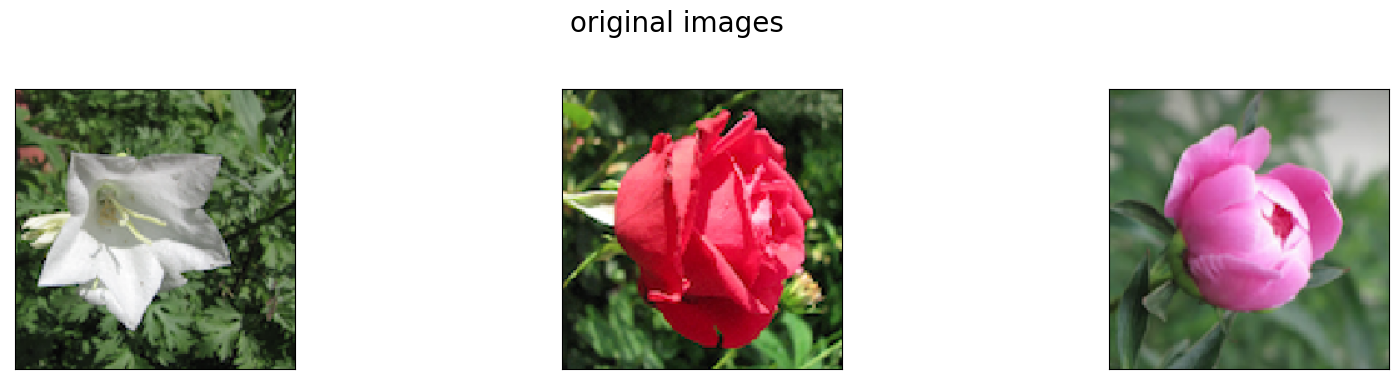

In [11]:
show_images(x_test, title="original images")

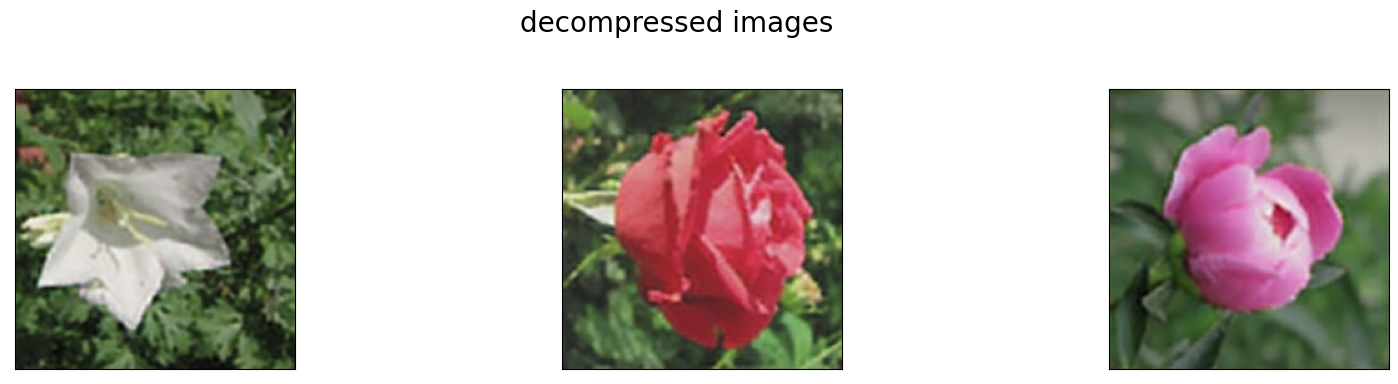

In [12]:
show_images(predicted_images, title="decompressed images")

In [13]:
# Evaluation de la qualité des images décompressées
for i, img in enumerate(predicted_images):
    similarity = ssim(x_test[i], img, multichannel=True)
    #print('Similarité structurelle de l\'image {}: {:.4f}'.format(i, similarity))
print("SSIM :", np.mean(similarity))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


SSIM : 0.70396525
